## **House Prices: EDA to ML**  

**What we will cover on Housing price Dataset**

* EDA(Detailed Analysis) with Pandas and Seaborn
* Find features with strong correlation to target
* Data Wrangling, convert categorical to numerical
* apply the basic Regression models of sklearn 
* use gridsearchCV to find the best parameters for each model

#Imports, Settings, Functions

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

#Importing data using wget command

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5407/868283/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586786168&Signature=rWekhCMwQnTPlXg6qCH6PTMvUL2C3mWWa8AzA%2B6dxA%2FnNf6XFvi6wwg4jM3Cv0B2DTnmPDPIAtfbNOS6SoYR7vMWxY8FwV0MQ%2F6oN08bUzfHOabW2f83K4f0dVmFh3MNzhBJSKysb0%2FV%2FzRzNe6FD6NGufEunncMl4v0TggaI58mWt6%2BQVrzcCYD47XxjGYXemqdDINcdfQxLmoY83Bfax4RcGaBhvgyc3gszpi7kDqEoH%2FZsaUqJq9Vtmfofa4jfoOjiT%2FX12XctWRNUrJA3mRWNtmL6a0N0hYrNt9wtNKEGnRenwtGQDxduYCZ%2F0l2J3EL2ntxs%2BeT5D9l0b6QwQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dhouse-prices-advanced-regression-techniques.zip" -c -O 'house-prices-advanced-regression-techniques.zip'

--2020-04-11 10:00:54--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5407/868283/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586786168&Signature=rWekhCMwQnTPlXg6qCH6PTMvUL2C3mWWa8AzA%2B6dxA%2FnNf6XFvi6wwg4jM3Cv0B2DTnmPDPIAtfbNOS6SoYR7vMWxY8FwV0MQ%2F6oN08bUzfHOabW2f83K4f0dVmFh3MNzhBJSKysb0%2FV%2FzRzNe6FD6NGufEunncMl4v0TggaI58mWt6%2BQVrzcCYD47XxjGYXemqdDINcdfQxLmoY83Bfax4RcGaBhvgyc3gszpi7kDqEoH%2FZsaUqJq9Vtmfofa4jfoOjiT%2FX12XctWRNUrJA3mRWNtmL6a0N0hYrNt9wtNKEGnRenwtGQDxduYCZ%2F0l2J3EL2ntxs%2BeT5D9l0b6QwQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dhouse-prices-advanced-regression-techniques.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; no

#Unzipping Data

In [0]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# Part 1: Exploratory Data Analysis

## Overview of features and relation to target

Let's get a first overview of the train and test dataset  
How many rows and columns are there?  
What are the names of the features (columns)?  
Which features are numerical, which are categorical?  
The **shape** and **info** methods answer these questions  
**head** displays some rows of the dataset  
**describe** gives a summary of the statistics (only for numerical columns)

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
print(train.shape)
print("*"*50)
print(test.shape)

(1460, 81)
**************************************************
(1459, 80)


In [0]:
##display the first five rows of the train dataset.
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [0]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


**Analysis generated based on above syntax**

train dataframe has 81 columns (79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)  
test dataframe has 80 columns (79 features + id) and 1459 entries  
There is lots of info that is probably related to the SalePrice like the area, the neighborhood, the condition and quality.   
Maybe other features are not so important for predicting the target, also there might be a strong correlation for some of the features (like GarageCars and GarageArea).
For some columns many values are missing: only 7 values for Pool QC in df train and 3 in df test

In [0]:

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

### The target variable : Distribution of SalePrice


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

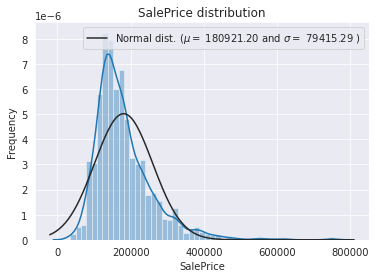

In [0]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

As we see, the target variable SalePrice is not normally distributed.  
This can reduce the performance of the ML regression models because some assume normal distribution,   
see [sklearn info on preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)  
Therfore we make a log transformation, the resulting distribution looks much better.  


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

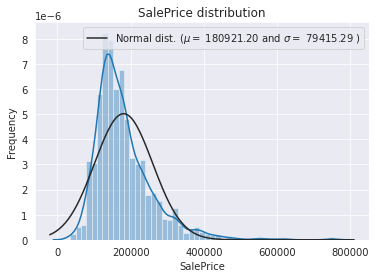

In [0]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

As we can see, The same is almost normally distributed



### Numerical and Categorical features

In [0]:
# Lets check Number of Numerical variable and categorical variables
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


# Part 2: Features engineering

##Overview of features and relation to target

Let's get a overview of the train and test dataset  
Check how many features have missing values
Check how to impute missing values for Categorical and 
Numerical features
Find data correlation with Target variable

In [0]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
LotFrontage,16.649538
MSZoning,0.137033
Functional,0.068517
Utilities,0.068517
SaleType,0.034258
KitchenQual,0.034258
Electrical,0.034258
Exterior2nd,0.034258
Exterior1st,0.034258


**Filling missing values**  
For a few columns there is lots of NaN entries.  
However, reading the data description we find this is not missing data
For example:
PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. Likewise for other variable

In [0]:
columns_category_as_None = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 
           'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType',
           'MSSubClass']

for col in columns_category_as_None:
  all_data[col] = all_data[col].fillna('None')

Replacing missing data with 0 (eg.
for GarageYrBlt it means No garage = no cars in such garage.)

In [0]:
columns_category_as_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 
                    'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea']

for col in columns_category_as_zero:
  all_data[col] = all_data[col].fillna(0)

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Filling variable with most common value like for MSZoning 'RL' is the most common value

In [0]:
columns_category_as_mode = ['MSZoning', 'Electrical', 'KitchenQual','Exterior1st', 
                    'Exterior2nd', 'SaleType']

for col in columns_category_as_mode:
  all_data[col] = all_data[col].fillna(all_data[col].mode()[0])     

Functional : data description says NA means typical

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it

In [0]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data = all_data.drop(['Utilities'], axis=1)

In [0]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


#Data Correlation

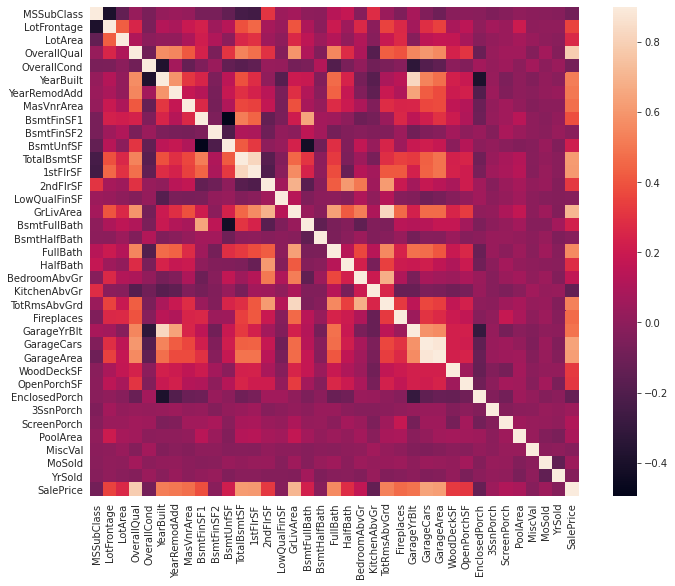

In [0]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
#corrmat.style.background_gradient(cmap='coolwarm')

#Transforming some numerical variables to categorical and doing Label Encoding of categorical variables to transform information in ordering set




In [0]:
column_to_category = ['MSSubClass','OverallCond','YrSold','MoSold']

for col in column_to_category:
  all_data[col] = all_data[col].apply(str)

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


# Getting dummy categorical features


In [0]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 220)


# Getting the new train and test sets.



In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Part 3: Scikit-learn basic regression models and comparison of results

**Test simple sklearn models and compare by metrics**

**We can test the following Regressors from scikit-learn:**  
LinearRegression  
DecisionTreeRegressor  
RandomForestRegressor 

In [0]:
score_calc = 'neg_mean_squared_error'
nr_cv = 5
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=nr_cv, verbose=1 , scoring = score_calc)
grid_linear.fit(train.values, y_train)

sc_linear = get_best_score(grid_linear)
print('----Mean Square Error----')
print(sc_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


36637.24616489512
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
----Mean Square Error----
36637.24616489512


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.3s finished


In [0]:
test.head(2)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,5,80.0,11622,1,1,3,0,5,5,1961,1961,0.0,3,4,4,4,3,5,468.0,3,144.0,270.0,882.0,4,1,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,3,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,5,81.0,14267,1,1,0,0,6,5,1958,1958,108.0,3,4,4,4,3,0,923.0,6,0.0,406.0,1329.0,4,1,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,3,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


#Use Predict command to get sales price for test dataset

In [0]:
grid_linear.predict(test.values)

array([119267.22955477, 163496.09797541, 175422.78378961, ...,
       172773.01943867, 108665.7149958 , 228727.47994068])